<a href="https://colab.research.google.com/github/LakshitaAgg15/MachineLearning/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApproval.csv")

In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
data.shape

(614, 13)

In [30]:

data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [31]:
data.dropna(inplace=True)

In [32]:
# Drop irrelevant columns
data.drop(columns={"Loan_ID"},inplace=True)

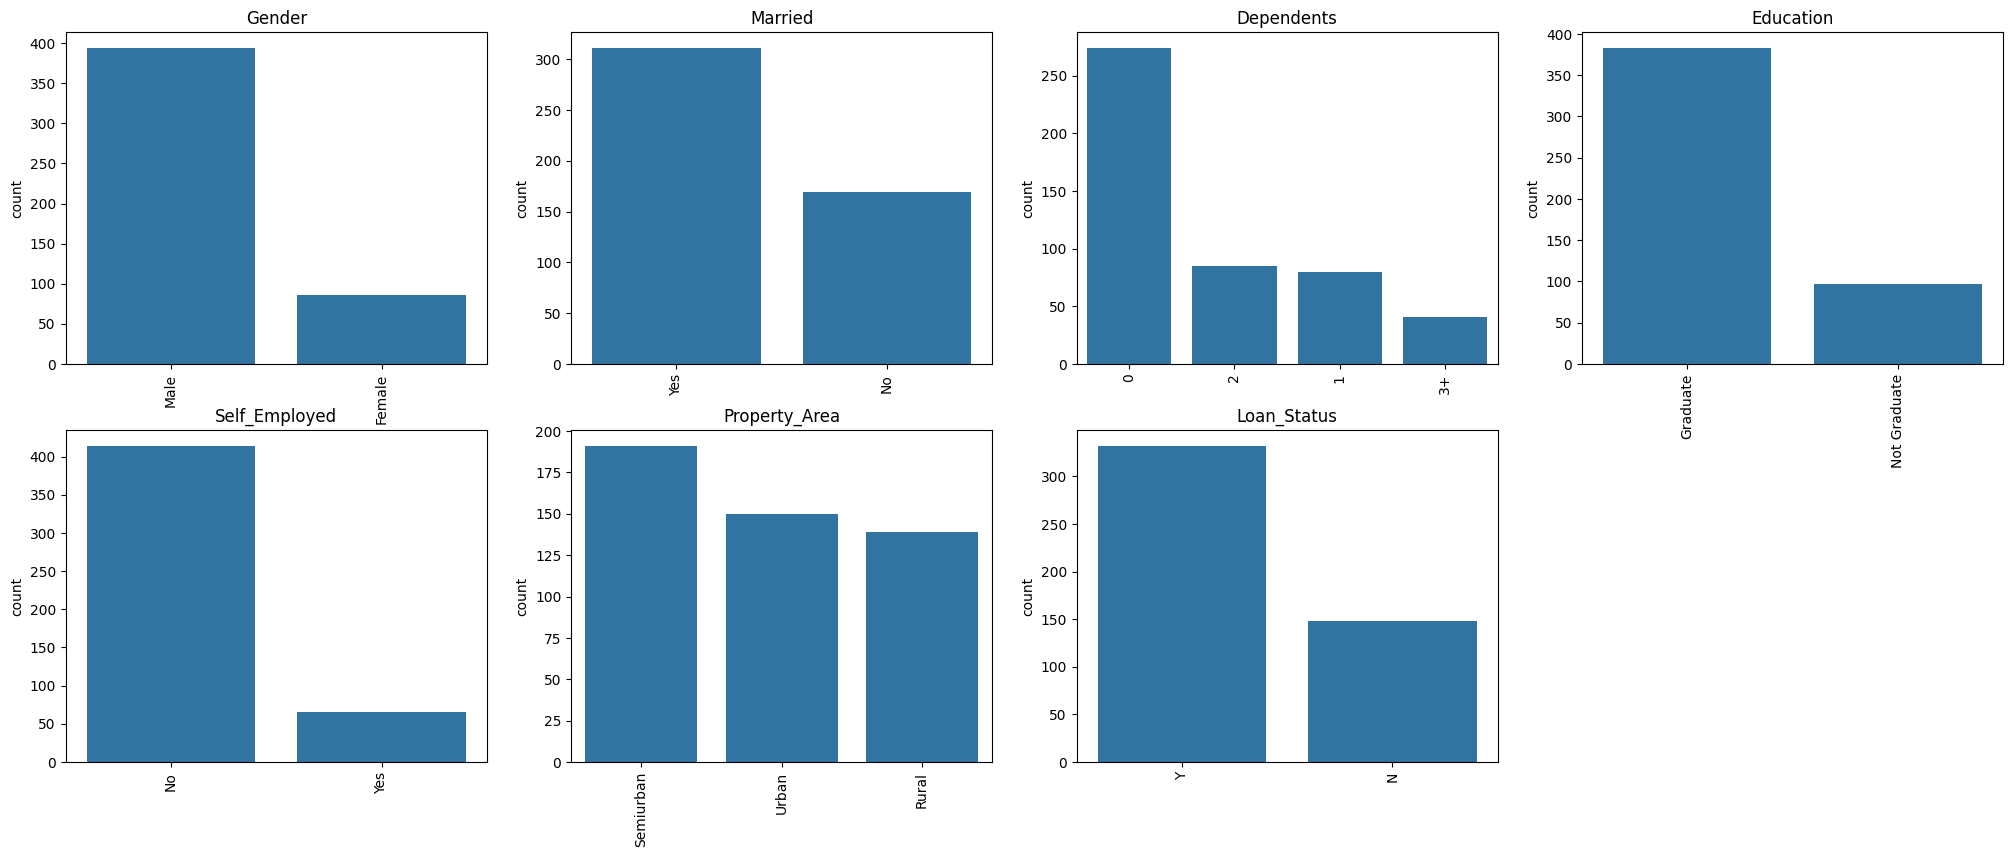

In [33]:
# Visualising all the columns of the dataset

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(25,56))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  plt.title(col)
  index +=1

from this we infer:
Majority of the applicants are Male,Married,have 0 dependents,are Garduate,Self Employed

The dataset is male-dominated.
Being married might be common among those applying for loans, possibly due to family responsibilities.Most applicants don’t have dependents, indicating financial independence or early stage of family life.

Higher education might be a factor influencing loan applications or approval.Salaried individuals dominate the loan applicants, possibly due to more stable incomes.Loans are accessed across different property areas fairly evenly, with semiurban slightly leading.

In [34]:
# converting categorical features to numeric

# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Now the complete data is in numerical format and ready for model building


In [36]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Loan_Status"])  #independent columns
y = data["Loan_Status"]  #dependent column(output)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((384, 11), (96, 11), (384,), (96,))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# training different models
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8229166666666666
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.59375
              precision    recall  f1-score   support

           0       0.28      0.25      0.26        28
           1       0.70      0.74      0.72        68

    accuracy                           0.59        96
   macro avg       0.49      0.49      0.49        96
weighted avg       0.58      0.59      0.59        96



Text(0, 0.5, 'Accuracy')

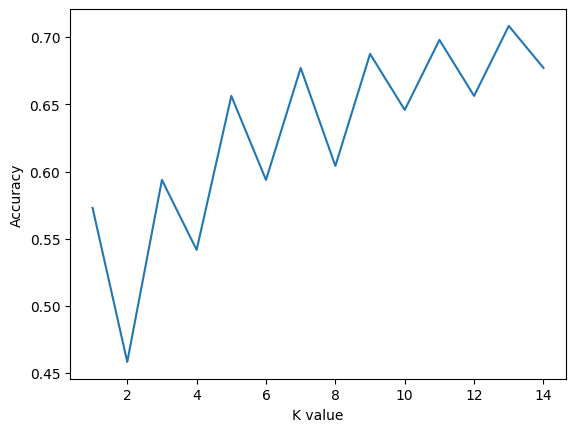

In [57]:
# Accuracy scores based on different k values
score=[]

for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,15),score)
plt.xlabel("K value")
plt.ylabel("Accuracy")

In [58]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7083333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
rf=RandomForestClassifier()
# default 100 decision trees based on GINI criteria
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8125
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.81      0.96      0.88        68

    accuracy                           0.81        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.81      0.79        96



INFERENCE

Random forest gave better results of all(Logistic Regression,SVM,KNN) with accuracy of 81%